# Práctica 3

## Ejercicio 3

## Autores : Jorge Martín Pastor y Juan Serrano Vara

## 26 nov 2018

<h1 align = "center" style="background-color:powderblue;"> Importamos las librerias</h1>


In [177]:
%reset
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import datasets, svm, metrics
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<h1 align = "center" style="background-color:powderblue;"> Importamos los datos</h1>


<Figure size 432x288 with 0 Axes>

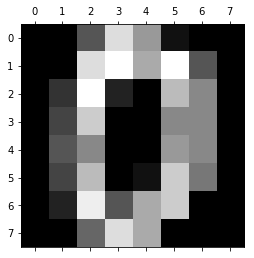

In [178]:
digits = load_digits()

## Pintamos un digito de ejemplo
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

<h1 align = "center" style="background-color:powderblue;">EJERCICIO 1</h1>

### Proprocesamiento de los datos

In [179]:
# Seleccionamos los datos del data set
# Con digits.images cogemos las imagenes mientras que con .target cogemos las etiquetas.
Etiqueta = digits.target
Datos = digits.images

# Shape original de los datos
print('Shape original de los datos: ',digits.images.shape)

# Como no podemos meter al clasificador datos en tres dimensiones lo pasamos a 2.
len_Datos = len(digits.images)
Datos = digits.images.reshape((len_Datos, -1))
print('Shape final de los datos',Datos.shape)


Shape original de los datos:  (1797, 8, 8)
Shape final de los datos (1797, 64)


### Creamos el conjunto de entrenamiento y el de validación

Como para el ejercicio 2 de la práctica se nos pide que seleccionemos 5 números que no se hayan presentado ni en el entrenamientro ni en la validación, seleccionaremos el 80% de los datos para entrenar, el 20% para evaluar,  y a la cantidad de datos de validar le quitaremos 5 datos pata el ejercicio2.

In [180]:
# Seleccioamos el 80% y el 20%
X_train, X_test, y_train, y_test = train_test_split(Datos, Etiqueta, test_size=0.20,shuffle=False)

# Como en X test tenemos 360 datos cogemos los últimos 5 y los eliminamos de x_test e y_test
numero = len(X_test)-5

X_Ej2 = X_test[numero:]

# Quitamos los 5 últimos datos de x_test e y_test
# De la siguiente manera eliminamos el último número del array y_train 5 veces, es decir, quitamos 5 veces el ultimo
X_test = np.delete(X_test, -1, 0) 
X_test = np.delete(X_test, -1, 0)
X_test = np.delete(X_test, -1, 0)
X_test = np.delete(X_test, -1, 0)
X_test = np.delete(X_test, -1, 0)

y_test = np.delete(y_test, -1, 0) 
y_test = np.delete(y_test, -1, 0)
y_test = np.delete(y_test, -1, 0)
y_test = np.delete(y_test, -1, 0)
y_test = np.delete(y_test, -1, 0)


print(X_Ej2.shape)
print(X_train.shape)

(5, 64)
(1437, 64)


<h1 align = "center" style="background-color:powderblue;"> EJERCICIO 1: Crea un clasificador que permita saber qué número es a partir de una imagen de este</h1>


<h1 style="background-color:powderblue;"> Configuración 1</h1>


gamma = "El parámetro gamma define hasta qué punto llega la influencia de un solo ejemplo de entrenamiento, con valores bajos que significan "lejos" y valores altos que significan "cerca". Los parámetros gamma pueden verse como el inverso del radio de influencia de las muestras seleccionadas por el modelo como vectores de soporte".

La validación del modelo se podría realizar con score, pero hemos preferido realizarlo nosotros manualmente prediciendo y comparando con el resultado esperado. 

Ejemplo con un valor para gamma muy bajo

In [181]:
# Creamos el clasificador
classifier1 = svm.SVC(gamma=0.001)

# Entrenamos el clasificador
classifier1.fit(X_train, y_train)

# Predecimos 
predicted = classifier1.predict(X_test)

# Las siguientes matrices nos indican el nivel de precisión de la predicción
print("Classification report for classifier %s:\n%s\n"
      % (classifier1, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.97      0.99        34
          1       0.97      1.00      0.99        36
          2       1.00      1.00      1.00        35
          3       0.97      0.81      0.88        37
          4       0.97      0.92      0.94        37
          5       0.93      1.00      0.96        37
          6       1.00      1.00      1.00        37
          7       0.97      1.00      0.99        36
          8       0.83      0.94      0.88        31
          9       0.94      0.94      0.94        35

avg / total       0.96      0.96      0.96       355


Confusion matrix:
[[33  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0 

### Explicación de las variables de la tabla mostrada con anterioridad

<img src="explicacion precision.png"/>

Como podemos observar nuestro modelo predictivo tiene un gran porcentaje de predecir correctamente.

<h1 style="background-color:powderblue;"> Configuración 2</h1>

Ejemplo con un valor para gama muy alto

In [182]:
# Creamos el clasificador
classifier2 = svm.SVC(gamma=1)

# Entrenamos el clasificador
classifier2.fit(X_train, y_train)

# Predecimos 
predicted = classifier2.predict(X_test)


# Las siguientes matrices nos indican el nivel de precisión de la predicción
print("Classification report for classifier %s:\n%s\n"
      % (classifier2, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        34
          1       0.00      0.00      0.00        36
          2       0.00      0.00      0.00        35
          3       0.10      1.00      0.19        37
          4       0.00      0.00      0.00        37
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        37
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        31
          9       0.00      0.00      0.00        35

avg / total       0.01      0.10      0.02       355


Confusion matrix:
[[ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0 35  0  

/Users/juan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h1 style="background-color:powderblue;"> Configuración 3</h1>

In [183]:
# Creamos el clasificador
classifier3 = svm.LinearSVC()

# Entrenamos el clasificador
classifier3.fit(X_train, y_train)

# Predecimos 
predicted = classifier3.predict(X_test)

# Las siguientes matrices nos indican el nivel de precisión de la predicción
print("Classification report for classifier %s:\n%s\n"
      % (classifier3, metrics.classification_report(y_test, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       1.00      0.94      0.97        34
          1       0.78      0.81      0.79        36
          2       0.97      1.00      0.99        35
          3       0.81      0.70      0.75        37
          4       0.89      0.92      0.91        37
          5       0.92      0.97      0.95        37
          6       0.97      1.00      0.99        37
          7       0.92      0.94      0.93        36
          8       0.83      0.81      0.82        31
          9       0.78      0.80      0.79        35

avg / total       0.89      0.89      0.89       355


Confusion matrix:
[[32  0  0  0  1  0  1  0  0  0]
 [ 0 29  0  2  1  0  0  0  0  4]
 [ 0  0 35  0  0  0  0 

### Conclusiones

Como podemos comprobar el modelo que mejor precide es el primero. Por lo cual cogeremos ese modelo para el ejercicio número 2.

<h1 align = "center" style="background-color:powderblue;"> EJERCICIO 2: Elige 5 números que no hayas usado ni para entrenar el modelo, ni para evaluarlo y clasifícalas. Usa para ello el modelo que mejor clasifique de los del punto anterior. Índica con que error ha funcionado el clasificador. </h1>

Predecimos con el modelo número 1.

No se puede calcular el error ya que, se supone que son datos completamente nuevos que no hemos utilizado, por lo cual no tendríamos la salida correcta.

In [184]:
prediccion = classifier1.predict(X_Ej2)
prediccion

array([9, 0, 8, 9, 8])

El modelo dice que es un:  9


<Figure size 432x288 with 0 Axes>

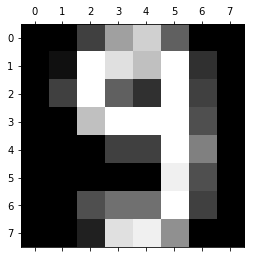

El modelo dice que es un:  0


<Figure size 432x288 with 0 Axes>

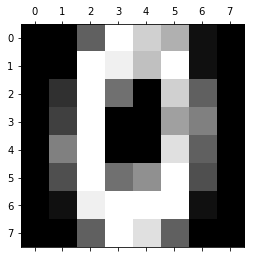

El modelo dice que es un:  8


<Figure size 432x288 with 0 Axes>

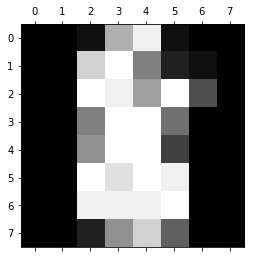

El modelo dice que es un:  9


<Figure size 432x288 with 0 Axes>

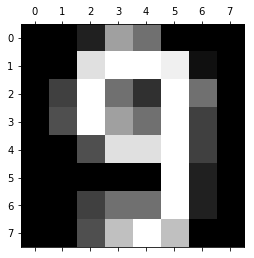

El modelo dice que es un:  8


<Figure size 432x288 with 0 Axes>

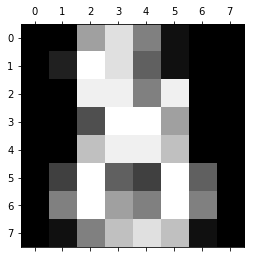

In [185]:
Datos = X_Ej2.reshape(len(X_Ej2), 8,8)
## Pintamos un digito de ejemplo

for i in range (0,len(Datos)):
    
    print('El modelo dice que es un: ' ,prediccion[i])
    #Dibujamos los datos que hemos predecido
    plt.gray() 
    plt.matshow(Datos[i]) 
    plt.show() 

<h1 align = "center" style="background-color:powderblue;"> Bibliografía</h1>

SVC: https://scikit-learn.org/stable/modules/svm.html

SVC: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html